In [2]:
# Import necessary libraries for data manipulation, machine learning, and visualization
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing
from sklearn.ensemble import RandomForestClassifier  # For classification model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For model evaluation metrics
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating plots


In [3]:
#Importing data set
file_path = '/content/drive/MyDrive/intern dataset/EmployeeData.csv'
df = pd.read_csv(file_path)


In [4]:
# Initialize a dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# Iterate over specified categorical columns to apply Label Encoding
for column in ['sales', 'salary']:
    # Create a LabelEncoder instance
    le = LabelEncoder()

    # Fit and transform the column data, and update the DataFrame with encoded values
    df[column] = le.fit_transform(df[column])

    # Store the fitted LabelEncoder in the dictionary for future use
    label_encoders[column] = le


In [5]:
# Separate features and target variable
X = df.drop('left', axis=1)  # Drop the 'left' column to create the feature matrix
y = df['left']  # Define the target variable 'left'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)


In [7]:
# Initialize the RandomForestClassifier with specified parameters
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier on the training data
rf_clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_rf = rf_clf.predict(X_test)


In [8]:
# Define a function to evaluate the model using common classification metrics
def evaluate_model(y_test, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)

    # Return the computed metrics
    return accuracy, precision, recall, f1

# Evaluate the Random Forest model's performance on the test data
rf_metrics = evaluate_model(y_test, y_pred_rf)


In [9]:
# Create a DataFrame to store the evaluation metrics for the Random Forest model
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],  # Define the metric names
    "Random Forest": [rf_metrics[0], rf_metrics[1], rf_metrics[2], rf_metrics[3]]  # Populate with the metrics from the Random Forest model
})

# Display the DataFrame with the evaluation metrics
print(metrics_df)


      Metric  Random Forest
0   Accuracy       0.988000
1  Precision       0.992263
2     Recall       0.957090
3   F1 Score       0.974359


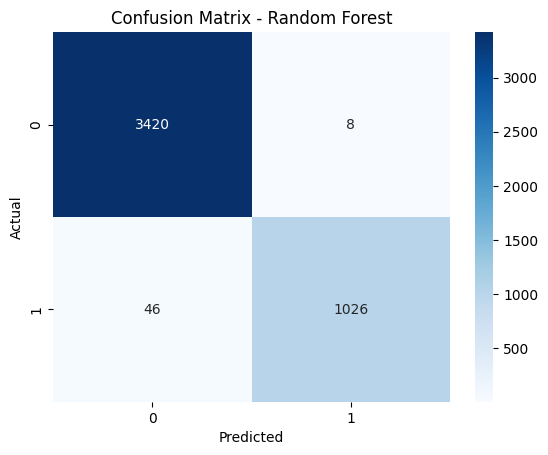

In [10]:
# Generate the confusion matrix for the Random Forest model's predictions
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add titles and labels to the heatmap
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the heatmap
plt.show()


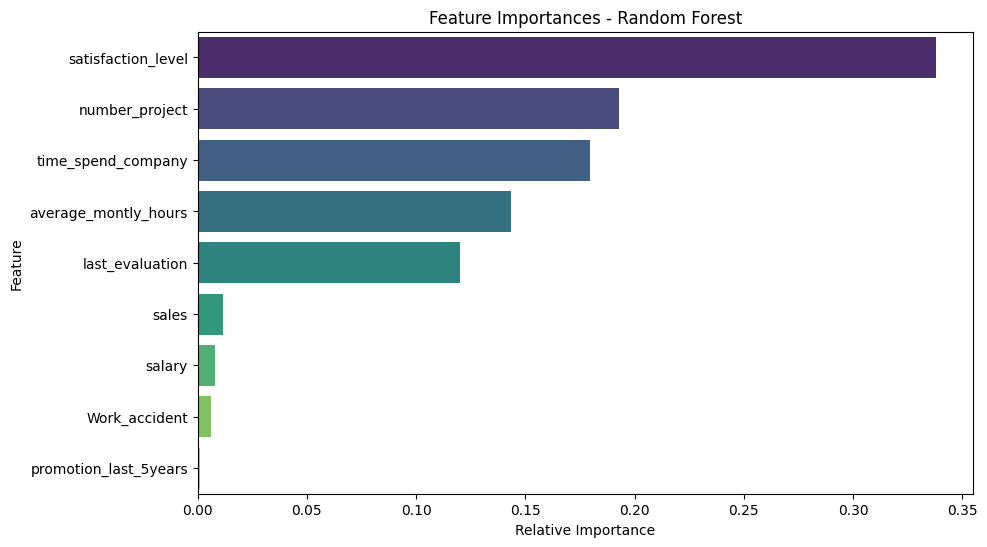

In [11]:
# Calculate feature importances from the trained Random Forest model
importances = rf_clf.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Create a plot to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Random Forest')

# Plot a barplot with the sorted feature importances
sns.barplot(
    x=importances[indices],       # Importance values, sorted
    y=X.columns[indices],         # Corresponding feature names, sorted
    hue=X.columns[indices],       # Optional: feature names as hue (color-coded)
    dodge=False,                  # Disable bar dodging to keep bars together
    palette='viridis',            # Use the 'viridis' color palette
    legend=False                  # Hide the legend
)

# Add labels to the axes
plt.xlabel('Relative Importance')
plt.ylabel('Feature')

# Display the feature importance plot
plt.show()
